In [23]:
import re
import time
import pandas as pd

In [2]:
pd_train = pd.read_csv("data/training_class.CSV")
pd_train.shape

(1241, 16093)

In [3]:
pd_train.head()

,Class,FP1,FP2,FP3,FP4,FP5,FP6,FP7,FP8,FP9,...,APC2D10_I_I,APC2D10_I_B,APC2D10_I_Si,APC2D10_I_X,APC2D10_B_B,APC2D10_B_Si,APC2D10_B_X,APC2D10_Si_Si,APC2D10_Si_X,APC2D10_X_X
0,Hepatotoxicity,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Hepatotoxicity,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hepatotoxicity,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Hepatotoxicity,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Hepatotoxicity,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# convert "Class" with value Hepatotoxicity: 1 and NonHepatotoxicity: 0
pd_train["label"] = pd_train["Class"].apply(lambda x: 1 if x == "Hepatotoxicity" else 0)
pd_train[["Class", "label"]].head()

,Class,label
0,Hepatotoxicity,1
1,Hepatotoxicity,1
2,Hepatotoxicity,1
3,Hepatotoxicity,1
4,Hepatotoxicity,1


In [5]:
pd_test = pd.read_csv("data/testing_class.CSV")
pd_test.shape

(286, 16093)

In [6]:
pd_test.head()

,Class,FP1,FP2,FP3,FP4,FP5,FP6,FP7,FP8,FP9,...,APC2D10_I_I,APC2D10_I_B,APC2D10_I_Si,APC2D10_I_X,APC2D10_B_B,APC2D10_B_Si,APC2D10_B_X,APC2D10_Si_Si,APC2D10_Si_X,APC2D10_X_X
0,Hepatotoxicity,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Hepatotoxicity,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hepatotoxicity,0,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Hepatotoxicity,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Hepatotoxicity,0,0,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# convert "Class" with value Hepatotoxicity: 1 and NonHepatotoxicity: 0
pd_test["label"] = pd_test["Class"].apply(lambda x: 1 if x == "Hepatotoxicity" else 0)
pd_test[["Class", "label"]].head()

,Class,label
0,Hepatotoxicity,1
1,Hepatotoxicity,1
2,Hepatotoxicity,1
3,Hepatotoxicity,1
4,Hepatotoxicity,1


## check classes ballancing

In [8]:
pd_train["Class"].value_counts()

Hepatotoxicity       683
NonHepatotoxicity    558
Name: Class, dtype: int64

In [9]:
pd_test["Class"].value_counts()

Hepatotoxicity       221
NonHepatotoxicity     65
Name: Class, dtype: int64

## check data distribution

In [10]:
# -> no null values
pd_train.isna().mean().value_counts()

0.0    16094
dtype: int64

In [11]:
# count unique number of values in each columns
ls_unique = []
for col in pd_train.columns:
    ls_unique.append(pd_train[col].nunique())

pd.DataFrame(ls_unique, index=pd_train.columns, columns=["unique"]).sort_values(
    by="unique", ascending=False
)

,unique
APC2D6_C_C,104
APC2D5_C_C,99
APC2D7_C_C,99
APC2D10_C_C,96
APC2D3_C_C,96
...,...
KRFP4203,1
KRFP4206,1
KRFP4210,1
KRFP4211,1


In [12]:
# check distribution (min, max, mean, percentile) of each column
feat_distr = pd_train.describe()
feat_distr

,FP1,FP2,FP3,FP4,FP5,FP6,FP7,FP8,FP9,FP10,...,APC2D10_I_B,APC2D10_I_Si,APC2D10_I_X,APC2D10_B_B,APC2D10_B_Si,APC2D10_B_X,APC2D10_Si_Si,APC2D10_Si_X,APC2D10_X_X,label
count,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,...,1241.0,1241.0,1241.000000,1241.0,1241.0,1241.0,1241.0,1241.0,1241.000000,1241.000000
mean,0.153102,0.206285,0.083803,0.201450,0.269944,0.228848,0.236906,0.069299,0.190975,0.150685,...,0.0,0.0,0.006446,0.0,0.0,0.0,0.0,0.0,0.020145,0.550363
std,0.360231,0.404801,0.277204,0.401245,0.444109,0.420260,0.425355,0.254064,0.393228,0.357886,...,0.0,0.0,0.160514,0.0,0.0,0.0,0.0,0.0,0.213452,0.497658
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,4.000000,0.0,0.0,0.0,0.0,0.0,4.000000,1.000000


In [13]:
feat_distr[["APC2D6_C_C"]]

,APC2D6_C_C
count,1241.000000
mean,20.595488
std,26.152421
min,0.000000
25%,7.000000
50%,15.000000
75%,23.000000
max,302.000000


<AxesSubplot: >

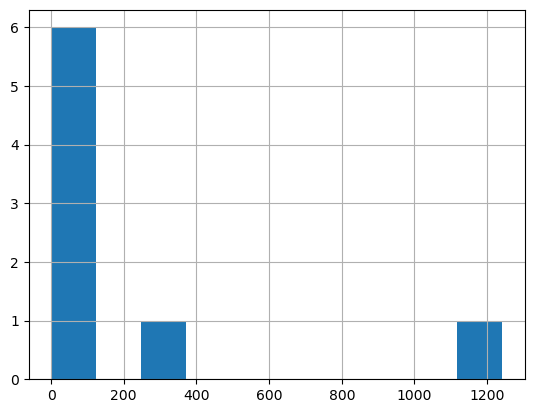

In [14]:
feat_distr["APC2D6_C_C"].hist()

In [15]:
# get prefix of features columns
features = pd_train.columns[1:-1]
features_prefix = {}
for feature in features:
    feat = feature.split("_")[0]
    # remove number postfix using regex replacement
    feat = re.sub(r"\d+", "", feat)
    if feat not in features_prefix:
        features_prefix[feat] = 1
    else:
        features_prefix[feat] += 1

print("Number of group features: ", len(features_prefix))
for key in features_prefix:
    print(f"{key}, \t\tNum features: {features_prefix[key]}")

Number of group features:  12
FP, 		Num features: 1024
ExtFP, 		Num features: 1024
EStateFP, 		Num features: 79
GraphFP, 		Num features: 1024
MACCSFP, 		Num features: 166
PubchemFP, 		Num features: 881
SubFP, 		Num features: 307
KRFP, 		Num features: 4860
ADD, 		Num features: 780
SubFPC, 		Num features: 307
KRFPC, 		Num features: 4860
APCD, 		Num features: 780


# Feature evaluation

In [16]:
# get columns with prefix "EStateFP"
group_feats = pd_train.filter(regex="EStateFP").columns.to_list()
group_feats[:20]

['EStateFP1',
 'EStateFP2',
 'EStateFP3',
 'EStateFP4',
 'EStateFP5',
 'EStateFP6',
 'EStateFP7',
 'EStateFP8',
 'EStateFP9',
 'EStateFP10',
 'EStateFP11',
 'EStateFP12',
 'EStateFP13',
 'EStateFP14',
 'EStateFP15',
 'EStateFP16',
 'EStateFP17',
 'EStateFP18',
 'EStateFP19',
 'EStateFP20']

In [17]:
# correlation between EStateFP features and label
corr = pd_train[group_feats + ["label"]].corr()
corr["label"].sort_values(ascending=False).head(20)

label         1.000000
EStateFP50    0.132017
EStateFP29    0.125380
EStateFP31    0.088536
EStateFP51    0.086912
EStateFP37    0.082788
EStateFP18    0.079283
EStateFP12    0.074295
EStateFP28    0.064478
EStateFP32    0.064122
EStateFP35    0.062394
EStateFP24    0.059942
EStateFP17    0.058038
EStateFP21    0.056851
EStateFP38    0.052691
EStateFP16    0.047106
EStateFP26    0.046743
EStateFP30    0.044407
EStateFP5     0.036315
EStateFP53    0.034822
Name: label, dtype: float64

In [29]:
# similarly for other group features, write to output file
global_start_time = time.time()
with open("output/feature_correlation.txt", "w") as f:
    for i, group in enumerate(features_prefix):
        local_start_time = time.time()
        print("Start group: ", group)
        f.write("\n")
        f.write("-----------------\n")
        f.write(f"Group {i + 1}: {group}\n")
        group_feats = pd_train.filter(regex=group).columns.to_list()
        # group_feats = group_feats[:5]
        corr = pd_train[group_feats + ["label"]].corr()
        f.write(str(corr["label"].sort_values(ascending=False).head(20)) + "\n")

        local_end_time = time.time()
        print(
            f"Group {i + 1}: {group} - Time taken: ", local_end_time - local_start_time
        )

global_end_time = time.time()
print("Total time taken: ", global_end_time - global_start_time)

Start group:  FP
Group 1: FP - Time taken:  477.7547707557678
Start group:  ExtFP
Group 2: ExtFP - Time taken:  2.3832571506500244
Start group:  EStateFP
Group 3: EStateFP - Time taken:  0.020962238311767578
Start group:  GraphFP
Group 4: GraphFP - Time taken:  2.202275514602661
Start group:  MACCSFP
Group 5: MACCSFP - Time taken:  0.06571722030639648
Start group:  PubchemFP
Group 6: PubchemFP - Time taken:  1.661372423171997
Start group:  SubFP
Group 7: SubFP - Time taken:  0.7925703525543213
Start group:  KRFP
Group 8: KRFP - Time taken:  208.40764498710632
Start group:  ADD
Group 9: ADD - Time taken:  0.07055950164794922
Start group:  SubFPC
Group 10: SubFPC - Time taken:  0.22055768966674805
Start group:  KRFPC
Group 11: KRFPC - Time taken:  59.259963035583496
Start group:  APCD
Group 12: APCD - Time taken:  0.023240089416503906
Total time taken:  752.86341547966
